In [6]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_df = "data/city_data.csv"
ride_data_df = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_df)
ride_data = pd.read_csv(ride_data_df)

# Combine the data into a single dataset
combined_pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
combined_pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

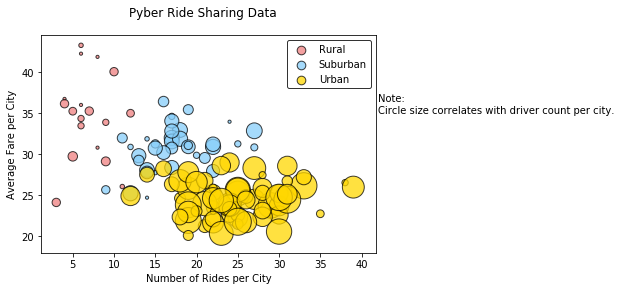

In [7]:
#group be city name
group_by_city = combined_pyber_df.groupby('city')

# var holding avg fare by city
average_fare = group_by_city.mean()['fare']

#var holding rides by city
ride_count = group_by_city['ride_id'].count()

# num of drivers
driver_count = group_by_city.mean()['driver_count']

# city type data
city_type = city_data.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": average_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Number of Drivers', ascending = False)

# Build the scatter plots for each city types 
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#Color Dictionary 
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Sharing Data')

# Incorporate the other graph properties scatter plots for each city type

plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Create a legend

legend = plt.legend(frameon = True, edgecolor = 'black')
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# Show plot
plt.show()


## Total Fares by City Type

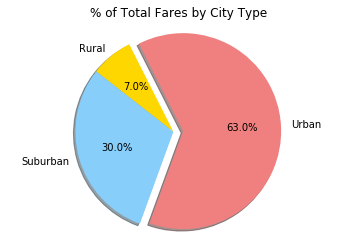

In [8]:
# Calculate Type Percents

total_fares = combined_pyber_df["fare"].sum()
urban_fare = combined_pyber_df.loc[combined_pyber_df["type"] == "Urban", "fare"].sum()
rural_fare = combined_pyber_df.loc[combined_pyber_df["type"] == "Rural", "fare"].sum()
suburban_fare = combined_pyber_df.loc[combined_pyber_df["type"] == "Suburban", "fare"].sum()
urban_percentage = round(urban_fare/total_fares, 2) *100
rural_percentage = round(rural_fare/total_fares, 2) *100
suburban_percentage = round(suburban_fare/total_fares, 2) *100

# Build Pie Chart

labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_percentage, rural_percentage, suburban_percentage]
explode = (0.1, 0, 0)  

# Pie chart

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% of Total Fares by City Type")

# Show Figure
plt.show()


## Total Rides by City Type

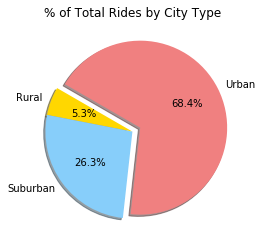

In [9]:
# Calculate Type Percents
group_by_type = combined_pyber_df.groupby(['type'])
total_rides_count = group_by_type["ride_id"].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Show Figure
plt.show()


## Total Drivers by City Type

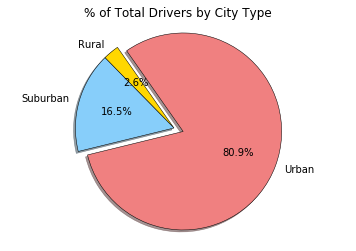

In [10]:
# Calculate Driver Percents
driver_sum = city_data.groupby('type').sum()['driver_count']


# Build Pie Charts
labels =["Rural","Suburban","Urban"]
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')

# Show Figure
plt.show()

